# **머신러닝 기말프로젝트**
### - 학생 성적 예측 모델 개발 -

해당 프로젝트는 XGboost를 사용하여 학생들의 성적을 예측하는 모델을 개발하는 것을 목표로 합니다. 이를 통해 학습 성과를 예측하고, 교육적 지원이 필요한 학생들을 미리 파악할 수 있습니다. 프로젝트의 주요 단계는 다음과 같습니다:데이터 셋은 총 6,607개의 학생 데이터와 20개의 특성으로 구성되어 있습니다.

1. **데이터 탐색**: 데이터셋을 로드하고 기본적인 특성을 파악합니다.
2. **데이터 전처리**: 결측치 처리, 범주형 변수 인코딩 등 데이터 품질을 향상시킵니다.
3. **데이터 분석**: 시험 점수 분포 분석 및 등급 변환을 통해 데이터를 이해합니다.
4. **모델 학습**: XGBoost 분류기를 사용하여 성적 예측 모델을 학습합니다.
5. **모델 평가**: 모델의 성능을 정확도, AUC-ROC 점수 등으로 평가합니다.
6. **특성 중요도 분석**: 모델이 중요하게 판단한 특성을 분석하 수 있을 것입니다.<br><br>

---

<b>사용 데이터셋: Student Performance Factors</b><br>

해당 데이터셋에는 학생들의 다양한 특성과 최종 시험 점수로 구성되어 있습니다.<br>
특성에는 학생들의 성적에 영향을 줄 수 있는 요인들 (학습 시간, 출석률, 부모 참여도, 교육 자원 접근성, 방과후 활동 참여 여부,또래 영향 등)이 있습니다. <br>

Hours_Studied: 주당 학습 시간<br>
Attendance: 출석률<br>
Parental_Involvement: 부모의 참여 수준<br>
Access_to_Resources: 교육 자원 접근성<br>
Extracurricular_Activities: 방과후 활동 참여 여부<br>
Sleep_Hours: 하루 평균 수면 시간<br>
Previous_Scores: 이전 성적<br>
Motivation_Level: 동기 부여 수준<br>
Internet_Access: 인터넷 접근성 여부<br>
Tutoring_Sessions: 과외 수업 여부<br>
Family_Income: 가족 소득 수준<br>
Teacher_Quality: 교사 품질<br>
School_Type: 학교 유형<br>
Peer_Influence: 또래 영향<br>
Physical_Activity: 하루 평균 신체 활동 시간<br>
Learning_Disabilities: 학습 장애 여부<br>
Parental_Education_Level: 부모의 교육 수준<br>
Distance_from_Home: 집에서 학교까지의 거리<br>
Gender: 성별<br>
Exam_Score: 최종 시험 점수<br>

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

---

<b>사용 알고리즘: XGBoost</b><br>

다양한 특성들 간의 복잡한 상호작용을 잘 포착할 수 있음<br>
feature_importance를 통해 어떤 요인이 성적에 더 중요한지 쉽게 파악할 수 있음<br>

- Random Forest와 XGBoost 둘 중 어떤 알고리즘을 쓸지 고민해보았음. 
성능면에서는 XGBoost가 Random Forest보다 더 높은 예측 정확도를 보였으며, 특성이 복잡하게 얽혀있는 경우는 XGBoost를 사용하는 것이 더 나은 것 같다고 판단. <br>

- Random Forest는 각 트리를 독립적으로 생성하는 반면, XGBoost는 이전 모델의 실수를 보완하며 학습하기 때문에 더 적은 수의 트리로도 비슷하거나 더 나은 성능을 달성할 수 있습니다 <br>


---

<b>모델의 성능은 정확도 93.87%, AUC-ROC 점수 0.824로 평가되었습니다.</b>

<b>매개변수 선택 근거<br></b>

1. 트리의 개수 (n_estimators=100) <br> 과적합과 성능 균형을 맞추기 위해
2. 학습률 (learning_rate=0.1)<br> 기본값보다 조금 낮추어서 과적합을 방지
3. 트리의 최대 깊이 (max_depth=6)<br> 과적합 방지를 위해 적절한 깊이로 설정
4. 데이터와 특성의 샘플링 비율 (subsample=0.8, colsample_bytree=0.8)<br> 다양한 데이터셋에서 안정적인 성능을 보임
5. 자식 노드 생성 최소 가중치 (min_child_weight=1)<br> 기본값을 유지하여 안정적인 노드 분할 보장

# #1 필요한 패키지 설치 및 임포트

먼저 필요한 패키지를 모두 임포트 하였습니다:

- **pandas**: 데이터 분석과 조작을 위한 기본 패키지
- **numpy**: 수치 연산을 위한 패키지
- **xgboost**: 고성능 그래디언트 부스팅 라이브러리
- **matplotlib**과 **seeborn**: 데이터 시각화 라이브러리

In [24]:
#1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# #2 기본적 데이터 탐색
학생 성적 예측을 위한 데이터셋을 로드하고 기본적인 특성을 분석해보았습니다:

1. **CSV 파일에서 데이터를 읽어와 DataFrame으로 저장합니다.**
2. **`shape`를 통해 데이터의 크기(행과 열의 수)를 확인합니다.**
3. **`info()`를 사용해 각 컬럼의 데이터 타입과 결측치 여부를 확인합니다.**
4. **`describe()`로 수치형 데이터의 기술 통계량을 분석=> 데이터 개수, 평균, 표준편차, 최솟값, 1사분위수, 중앙값 (2사분위수), 3사분위수, 최댓값을 계산합니다.**

**데이터 크기 (6607, 20)**
-  총 6,607개의 학생 데이터 (행)
-  20개의 특성 (열)

데이터 셋은 총 6,607개의 학생 데이터와 20개의 특성으로 구성되어 있습니다. <br>
특성에는 학습 시간, 수업 출석률, 수면 시간, 시험 점수 등 성적에 영향을 줄 수 있는 요소들로 구성되어있습니다.

In [25]:
#2
#데이터 로드
df = pd.read_csv(r'C:\Users\ss\Machine Learning\StudentPerformanceFactors.csv')

# 기본 정보 확인
print("데이터 크기:", df.shape)
print("\n데이터 정보:")
print(df.info())

print("\n기술 통계:") 
display(df.describe())

데이터 크기: (6607, 20)

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence      

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# #3 데이터 특성 파악
효과적인 전처리를 위해서 데이터의 구조와 특성을 자세히 파악합니다:

1. **수치형과 범주형 변수를 구분하여 파악합니다.**
2. **범주형 변수의 고유값을 확인합니다.**

In [26]:
#3
print("\n현재 데이터 특징:")
print("1. 수치형 변수:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols.tolist())
print("\n2. 범주형 변수:")
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols.tolist())

# 범주형 변수 확인
categorical_columns = df.select_dtypes(include=['object']).columns

# 범주형 변수의 고유한 값 출력
print("\n범주형 변수의 고유한 값:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


현재 데이터 특징:
1. 수치형 변수:
['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

2. 범주형 변수:
['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

범주형 변수의 고유한 값:
Parental_Involvement: ['Low' 'Medium' 'High']
Access_to_Resources: ['High' 'Medium' 'Low']
Extracurricular_Activities: ['No' 'Yes']
Motivation_Level: ['Low' 'Medium' 'High']
Internet_Access: ['Yes' 'No']
Family_Income: ['Low' 'Medium' 'High']
Teacher_Quality: ['Medium' 'High' 'Low' nan]
School_Type: ['Public' 'Private']
Peer_Influence: ['Positive' 'Negative' 'Neutral']
Learning_Disabilities: ['No' 'Yes']
Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home: ['Near' 'Moderate' 'Far' nan]
Gender: ['Male' 'Female']


먼저 데이터의 변수들을 수치형과 범주형으로 구분하여 파악했습니다. <br><br>
데이터셋의 변수들을 분석한 결과, <mark><b>총 20개의 변수가 7개의 수치형 변수와 13개의 범주형 변수</b></mark>로 구성되어 있음을 확인했습니다. <br><br>
이러한 범주형 변수들은 머신러닝 모델이 처리할 수 있도록 수치형으로 변환이 필요하여, 각 변수의 고유값들을 먼저 파악하였습니다.

# #4 데이터 전처리: 결측치 처리 및 인코딩

데이터의 품질을 향상시키기 위한 전처리 작업 진행

1. **결측치 존재 여부를 확인합니다.**
2. **범주형 변수를 수치형으로 인코딩합니다.**
3. **결측치를 적절한 값으로 대체합니다.**


In [27]:
#4
#1. 결측치 확인 및 처리
print("결측치 개수:")
print(df.isnull().sum())

# 2. 데이터 타입 구분
# object 타입과 수치형 타입 구분
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 3. 결측치 대체
# 수치형 변수 결측치 처리
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# 범주형 변수 결측치 처리
categorical_imputer = SimpleImputer(strategy='most_frequent')
if len(categorical_cols) > 0:  # 범주형 변수가 존재하는 경우에만 처리
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# 4. 결측치 처리 확인
print("\n결측치 대체 후:")
print(df.isnull().sum())

# 5. 범주형 변수 인코딩 (Grade 제외)
label_encoders = {}
for col in categorical_cols:
    if col != 'Grade':  # Grade 열은 나중에 별도로 처리
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col])

# 6. Exam_Score를 기반으로 Grade 생성
def assign_grade(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

# Grade 생성
df['Grade'] = df['Exam_Score'].apply(assign_grade)

# 7. Grade 인코딩 (A=4, B=3, C=2, D=1, F=0)
grade_encoder = LabelEncoder()
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Grade'] = df['Grade'].map(grade_mapping)

결측치 개수:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

결측치 대체 후:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions   

# 1. 결측치 검사

데이터의 품질을 확인하기 위해 먼저 결측치 여부를 검사하였습니다. 초기 결측치 검사 결과, 다음 세 개의 변수에서 <mark>**총 235개의 결측치**</mark>가 발견되었습니다:

- **Teacher_Quality**: 78개
- **Parental_Education_Level**: 90개
- **Distance_from_Home**: 67개

---

# 2. 결측치 처리 전략

결측치를 단순 제거할 경우:

- 총 235개의 데이터 손실 발생 가능
- 전체 데이터의 약 3.6%에 해당
- 모델의 정확도 저하 우려

따라서, 데이터의 손실을 최소화하면서 품질을 유지하기 위해 **SimpleImputer**를 사용하여 결측치를 평균값과 최빈값으로 대체하는 전략을 선택하였습니다. <br>
(수치형 데이터는 평균값, 범주형 데이터는 최빈값으로)

---

# 3. 결측치 처리 결과

- 원본 데이터 크기 유지: (6607, 20)
- 모든 변수의 결측치가 성공적으로 대체됨
- 데이터의 완전성 확보
 변수의 결측치가 성공적으로 대체됨
- 데이터의 완전성 확보


# #5 시험 점수 분포 분석

학생들의 시험 점수 분포를 다양한 방법으로 시각화

1. **기본 통계 정보를 확인합니다.**
2. **히스토그램을 통해 점수 분포를 시각화합니다.**


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23.0,84.0,1,0,0,7.0,73.0,1,1,0.0,...,2,1,2,3.0,0,1,2,1,67.0,1
1,19.0,64.0,1,2,0,8.0,59.0,1,1,2.0,...,2,1,0,4.0,0,0,1,0,61.0,1
2,24.0,98.0,2,2,1,7.0,91.0,2,1,2.0,...,2,1,1,4.0,0,2,2,1,74.0,2
3,29.0,89.0,1,2,1,8.0,98.0,2,1,1.0,...,2,1,0,4.0,0,1,1,1,71.0,2
4,19.0,92.0,2,2,1,6.0,65.0,2,1,3.0,...,0,1,1,4.0,0,0,2,0,70.0,2


count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

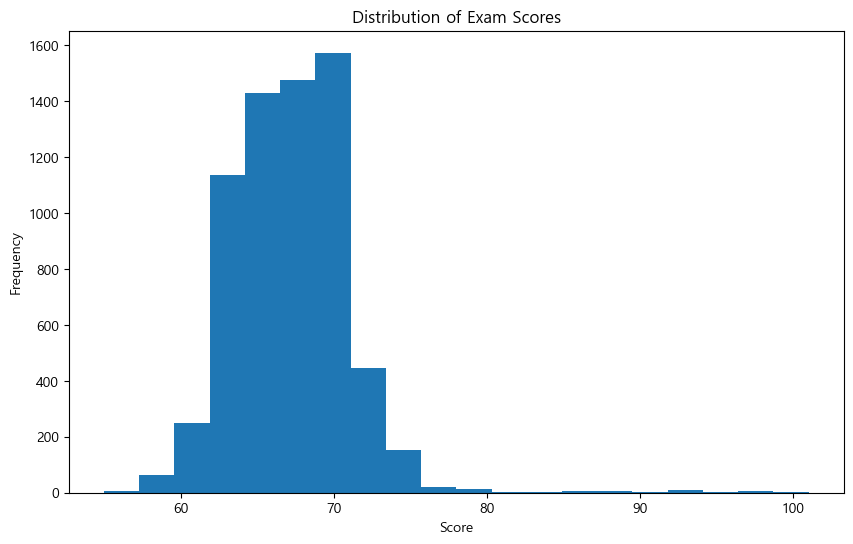

In [28]:
#5
#처음 5개 행 데이터프레임 형식으로 출력
display(df.head())

# Exam_Score의 기본 통계 정보도 표 형식으로 출력
display(df['Exam_Score'].describe())

# 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['Exam_Score'], bins=20)
plt.title('Distribution of Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

학생들의 성적 분포를 확인해본 결과 60~70점 대의 학생들이 가장 많았습니다. 

# #6 등급 변환 및 분석

시험 점수를 등급으로 변환하고 등급별 특성을 분석합니다:

1. **점수를 A, B, C, D, F 등급으로 변환합니다.**
2. **등급 분포를 시각화합니다.**
3. **등급별 주요 특성의 평균값을 분석합니다.**<br>

==> 정확한 점수를 예측하는 것보다 등급을 예측하는 것이 모델의 복잡성을 줄이고, 과적합 문제를 줄일 수 있기 때문에 등급 예측으로 진행

등급 분포:
Grade
D    4914
C    1577
F      68
B      26
A      22
Name: count, dtype: int64

등급 비율:
Grade
D    74.38
C    23.87
F     1.03
B     0.39
A     0.33
Name: proportion, dtype: float64 %


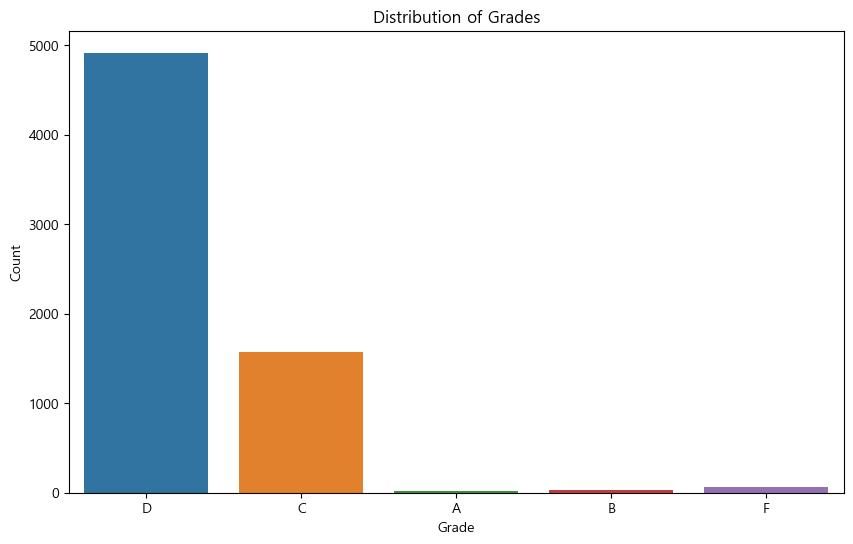


등급별 주요 특성 평균값:
       Hours_Studied  Attendance  Previous_Scores
Grade                                            
A          21.500000   84.727273        82.636364
B          17.807692   74.230769        66.346154
C          24.006975   90.315155        78.924540
D          18.819902   76.892145        73.940578
F          10.308824   63.852941        68.235294


In [29]:
#6
#등급 변환 함수 정의
def assign_grade(score):
    if score >= 90: return 'A'    # 90점 이상
    elif score >= 80: return 'B'   # 80-89점
    elif score >= 70: return 'C'   # 70-79점
    elif score >= 60: return 'D'   # 60-69점
    else: return 'F'              # 60점 미만

# 점수를 등급으로 변환
df['Grade'] = df['Exam_Score'].apply(assign_grade)

# 변환 결과 확인
print("등급 분포:")
print(df['Grade'].value_counts())
print("\n등급 비율:")
print(df['Grade'].value_counts(normalize=True).mul(100).round(2), "%")

# 등급 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grade')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# 등급별 다른 특성들의 평균값 확인
numeric_columns = ['Hours_Studied', 'Attendance', 'Previous_Scores']  # 주요 수치형 특성들
print("\n등급별 주요 특성 평균값:")
print(df.groupby('Grade')[numeric_columns].mean())

# #7 특성과 타겟 분리

- 모델 학습을 위해 특성과 타겟 변수를 분리
- 데이터를 학습용과 테스트용으로 나눈 후 스케일링을 수행

In [30]:
# 7. 특성과 타겟 분리
X = df.drop(['Exam_Score', 'Grade'], axis=1)

# Grade를 숫자로 변환
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
y = df['Grade'].map(grade_mapping)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# #8 모델 학습 및 성능 평가

XGBoost를 사용하여 모델을 학습하고 성능을 평가합니다:

1. **XGBoost 모델을 학습합니다.**
2. **정확도, AUC-ROC 점수를 계산합니다.**
3. **분류 보고서를 생성합니다.**
4. **과적합 여부를 확인합니다.**


In [31]:
# 모델 학습
model = XGBClassifier(
    n_estimators=100,        # 트리의 개수
    learning_rate=0.1,       # 학습률 (기본값 0.3보다 낮춰서 과적합 방지)
    max_depth=6,             # 트리의 최대 깊이
    min_child_weight=1,      # 자식 노드 생성에 필요한 최소 가중치
    subsample=0.8,           # 데이터 샘플링 비율
    colsample_bytree=0.8,    # 특성 샘플링 비율
    random_state=42          # 재현성을 위한 시드값
)
model.fit(X_train_scaled, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr')
print("정확도:", accuracy)
print("AUC-ROC:", auc)
print("\n분류 보고서:")
print(classification_report(y_test, y_pred, zero_division=1))

# 과적합 여부 확인
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
if train_accuracy - test_accuracy > 0.1:
    print("\n과적합이 발생했을 가능성이 있습니다. 훈련 데이터와 테스트 데이터의 정확도 차이가 0.1 이상입니다.")
else:
    print("\n과적합이 발생하지 않은 것 같습니다.")

정확도: 0.9387291981845688
AUC-ROC: 0.8240397983247856

분류 보고서:
              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.99      0.96       963
           2       0.95      0.84      0.89       341
           3       1.00      0.00      0.00         4
           4       1.00      0.00      0.00         3

    accuracy                           0.94      1322
   macro avg       0.94      0.44      0.47      1322
weighted avg       0.94      0.94      0.93      1322


과적합이 발생하지 않은 것 같습니다.


훈련 데이터와 테스트 데이터 모델의 정확도를 비교하여 과적합 여부를 확인<br>

분류 보고서에 대한 결과를 확인했을 때<b>
- B,C, F 등급의 데이터는 많기 때문에 우수한 성능을 보임
- D 등급과 A 등급은 데이터 수가 너무 적어 예측하기 힘들어보임<br>

=> <b>SMOTE</b>를 적용하여 클래스 불균형을 해소해보려고 했지만 결과 차이가 미미하여 기존 모델을 사용하기로 함

# #9 특성 중요도 분석 및 시각화

모델이 학습한 특성의 중요도를 분석하고 시각화합니다:

1. **각 특성의 중요도를 계산합니다.**
2. **상위 10개 중요 특성을 시각화합니다.**

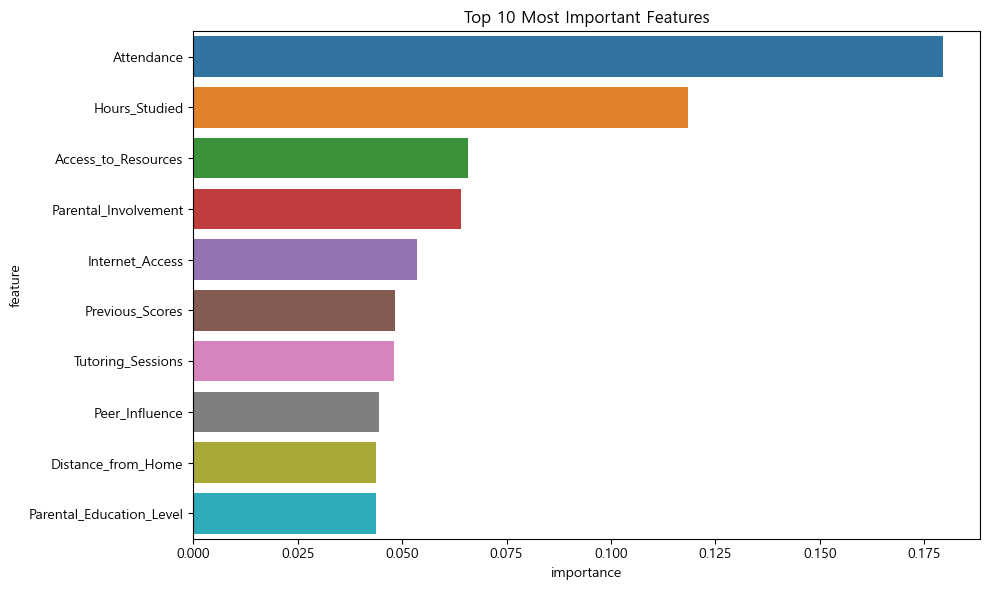

In [32]:
# 9. 특성 중요도 시각화
feature_importance = pd.DataFrame({
   'feature': X.columns,
   'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

모델의 특성 중요도를 사용하여 가장 중요한 10개의 특성을 뽑아보았습니다.<br><br>상위 10개의 특성을 분석한 결과, <b>수업 출석률</b>이 성적에 가장 큰 영향을 주었으며 그 다음으로는 학습 시간, 교육 자원 접근성, 부모의 참여 수준 등 중요한 영향을 준다고 파악되었습니다. 

# #10 등급 분포 시각화

학생들의 성적 등급 분포를 알파벳 등급으로 시각화합니다:

1. **수치형 등급을 알파벳 등급(A, B, C, D, F)으로 매핑합니다.**
2. **막대 그래프를 사용하여 등급별 학생 수를 표시합니다.**


Unique values in Grade column: ['D' 'C' 'A' 'B' 'F']


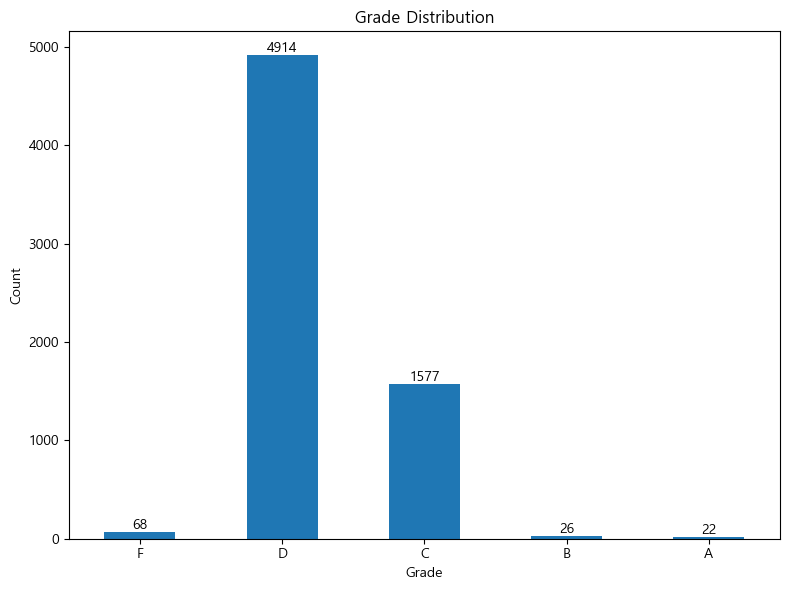


등급별 분포:
F: 68 명 (1.0%)
D: 4914 명 (74.4%)
C: 1577 명 (23.9%)
B: 26 명 (0.4%)
A: 22 명 (0.3%)


In [33]:
# 10. 등급 분포 확인
plt.figure(figsize=(8, 6))

# 현재 Grade 값 확인
print("Unique values in Grade column:", df['Grade'].unique())

# 매핑 방향 확인 및 수정
if isinstance(df['Grade'].iloc[0], str):  # 만약 Grade가 문자열이면
    grade_counts = df['Grade'].value_counts().sort_index(ascending=False)
else:  # 만약 Grade가 숫자면
    grade_mapping = {4:'A', 3:'B', 2:'C', 1:'D', 0:'F'}
    grade_counts = df['Grade'].map(grade_mapping).value_counts().sort_index(ascending=True)

# 막대 그래프 생성
ax = grade_counts.plot(kind='bar')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 막대 위에 값 표시
for i, v in enumerate(grade_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 등급별 비율도 출력
print("\n등급별 분포:")
percentage = grade_counts / len(df) * 100
for grade, count in grade_counts.items():
    print(f"{grade}: {count} 명 ({percentage[grade]:.1f}%)")

# #11 학생 성적 분석 도구 구현

개별 학생의 성적을 분석하고 시각화하는 종합 도구를 구현합니다:

1. **학생의 모든 속성 정보와 입력값을 표시합니다.**
2. **예측된 성적 등급을 계산합니다.**
3. **주요 특성에 대한 통계적 비교 (입력값 vs 전체 데이터)를 수행합니다.**
4. **결과의 시각화 및 상세 비교 테이블을 제공합니다.**


속성 정보 및 입력값:
Hours_Studied: 공부 시간 (주 단위 학습 시간: 정수값)
입력값: 40
Attendance: 출석률 (%, 0에서 100까지 정수값)
입력값: 100
Parental_Involvement: 부모의 참여 수준 (1-없음, 2-보통, 3-높음)
입력값: 3
Access_to_Resources: 교육 자원 접근성 (1-없음, 2-보통, 3-많음)
입력값: 3
Extracurricular_Activities: 방과후 활동 참여 여부 (0-아니오, 1-예)
입력값: 1
Sleep_Hours: 수면 시간 (하루 평균 수면 시간, 0에서 24까지 정수값)
입력값: 7
Previous_Scores: 이전 성적 (0에서 100까지 정수값)
입력값: 90
Motivation_Level: 동기 부여 수준 (1-낮음, 2-보통, 3-높음)
입력값: 2
Internet_Access: 인터넷 접근성 여부 (0-아니오, 1-예)
입력값: 1
Tutoring_Sessions: 과외 수업 여부 (0-아니오, 1-예)
입력값: 1
Family_Income: 가족 소득 수준 (1-낮음, 2-보통, 3-높음)
입력값: 2
Teacher_Quality: 교사 품질 (1-낮음, 2-보통, 3-높음)
입력값: 2
School_Type: 학교 유형 (0-공립, 1-사립)
입력값: 1
Peer_Influence: 또래 영향 (1-부정적, 2-보통, 3-긍정적)
입력값: 3
Physical_Activity: 신체 활동 시간 (하루 평균 시간, 0에서 24까지 정수값)
입력값: 4
Learning_Disabilities: 학습 장애 여부 (0-없음, 1-있음)
입력값: 0
Parental_Education_Level: 부모의 교육 수준 (1-낮음, 2-보통, 3-높음)
입력값: 3
Distance_from_Home: 집에서 학교까지의 거리 (1-가까움, 2-보통, 3-멀음)
입력값: 1
Gender: 성별 (0-남성, 1-여성)
입력값: 1
예측된 등급: C
예측된 등급별

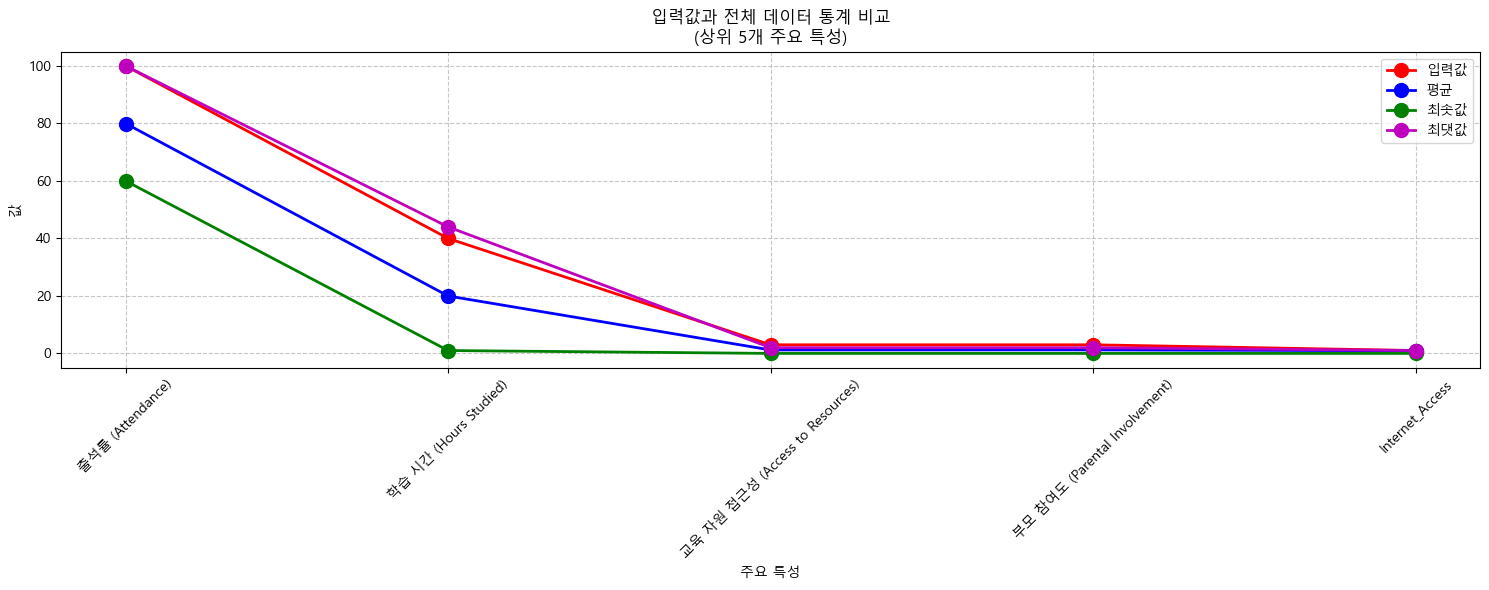


                                              === 상세 비교 (상위 5개 주요 특성) ===



,출석률 (Attendance),학습 시간 (Hours Studied),교육 자원 접근성 (Access to Resources),부모 참여도 (Parental Involvement),Internet_Access
입력값,100.000000,40.000000,3.000000,3.00000,1.000000
평균,79.977448,19.975329,1.203421,1.22007,0.924474
최솟값,60.000000,1.000000,0.000000,0.00000,0.000000
최댓값,100.000000,44.000000,2.000000,2.00000,1.000000


In [34]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

def analyze_and_visualize_student(sample_data, model, scaler, df, feature_importance):
    # 1. 속성 정보 출력
    attributes = {
        'Hours_Studied': "공부 시간 (주 단위 학습 시간: 정수값)",
        'Attendance': "출석률 (%, 0에서 100까지 정수값)",
        'Parental_Involvement': "부모의 참여 수준 (1-없음, 2-보통, 3-높음)",
        'Access_to_Resources': "교육 자원 접근성 (1-없음, 2-보통, 3-많음)",
        'Extracurricular_Activities': "방과후 활동 참여 여부 (0-아니오, 1-예)",
        'Sleep_Hours': "수면 시간 (하루 평균 수면 시간, 0에서 24까지 정수값)",
        'Previous_Scores': "이전 성적 (0에서 100까지 정수값)",
        'Motivation_Level': "동기 부여 수준 (1-낮음, 2-보통, 3-높음)",
        'Internet_Access': "인터넷 접근성 여부 (0-아니오, 1-예)",
        'Tutoring_Sessions': "과외 수업 여부 (0-아니오, 1-예)",
        'Family_Income': "가족 소득 수준 (1-낮음, 2-보통, 3-높음)",
        'Teacher_Quality': "교사 품질 (1-낮음, 2-보통, 3-높음)",
        'School_Type': "학교 유형 (0-공립, 1-사립)",
        'Peer_Influence': "또래 영향 (1-부정적, 2-보통, 3-긍정적)",
        'Physical_Activity': "신체 활동 시간 (하루 평균 시간, 0에서 24까지 정수값)",
        'Learning_Disabilities': "학습 장애 여부 (0-없음, 1-있음)",
        'Parental_Education_Level': "부모의 교육 수준 (1-낮음, 2-보통, 3-높음)",
        'Distance_from_Home': "집에서 학교까지의 거리 (1-가까움, 2-보통, 3-멀음)",
        'Gender': "성별 (0-남성, 1-여성)"
    }

    print("속성 정보 및 입력값:")
    for attr, description in attributes.items():
        print(f"{attr}: {description}")
        print(f"입력값: {sample_data[attr]}")

    # 2. 예측 수행 및 확률 출력
    new_data = pd.DataFrame([sample_data])
    new_data_scaled = scaler.transform(new_data)
    predicted_grade_proba = model.predict_proba(new_data_scaled)
    predicted_grade = model.predict(new_data_scaled)[0]
    grade_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}  # 라벨 인코딩에 맞춰 조정

    print(f"예측된 등급: {grade_mapping[predicted_grade]}")
    print(f"예측된 등급별 확률: {[f'{prob*100:.2f}%' for prob in predicted_grade_proba[0]]}")

    # 3. 입력값과 주요 특성 통계 비교
    # 한글 매핑
    feature_names_kr = {
        'Hours_Studied': '학습 시간 (Hours Studied)',
        'Attendance': '출석률 (Attendance)',
        'Previous_Scores': '이전 성적 (Previous Scores)',
        'Parental_Involvement': '부모 참여도 (Parental Involvement)',
        'Access_to_Resources': '교육 자원 접근성 (Access to Resources)'
    }

    # 상위 5개 중요 특성
    top_features = feature_importance['feature'].head(5).tolist()
    comparison_data = pd.DataFrame({
        '입력값': new_data[top_features].iloc[0],
        '평균': df[top_features].mean(),
        '최솟값': df[top_features].min(),
        '최댓값': df[top_features].max()
    })

    # 시각화
    plt.figure(figsize=(15, 6))
    x = range(len(top_features))
    plt.plot(x, comparison_data['입력값'], 'ro-', label='입력값', linewidth=2, markersize=10)
    plt.plot(x, comparison_data['평균'], 'bo-', label='평균', linewidth=2, markersize=10)
    plt.plot(x, comparison_data['최솟값'], 'go-', label='최솟값', linewidth=2, markersize=10)
    plt.plot(x, comparison_data['최댓값'], 'mo-', label='최댓값', linewidth=2, markersize=10)

    plt.xlabel('주요 특성')
    plt.ylabel('값')
    plt.title('입력값과 전체 데이터 통계 비교\n(상위 5개 주요 특성)')
    kr_features = [feature_names_kr.get(feat, feat) for feat in top_features]
    plt.xticks(x, kr_features, rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 상세 비교 테이블 출력
    print("\n                                              === 상세 비교 (상위 5개 주요 특성) ===\n")
    comparison_data.index = kr_features
    display(comparison_data.T)

# 실행 예시
sample_data = {
    'Hours_Studied': 40, 
    'Attendance': 100,
    'Parental_Involvement': 3,
    'Access_to_Resources': 3,
    'Extracurricular_Activities': 1,
    'Sleep_Hours': 7,
    'Previous_Scores': 90,
    'Motivation_Level': 2,
    'Internet_Access': 1,
    'Tutoring_Sessions': 1,
    'Family_Income': 2,
    'Teacher_Quality': 2,
    'School_Type': 1,
    'Peer_Influence': 3,
    'Physical_Activity': 4,
    'Learning_Disabilities': 0,
    'Parental_Education_Level': 3,
    'Distance_from_Home': 1,
    'Gender': 1
}

analyze_and_visualize_student(sample_data, model, scaler, df, feature_importance)

---

## <b>Chat GPT 사용 내역</b>

https://chatgpt.com/share/6756540a-d214-8007-88e5-67c101c8c191
<br><br>


---

## 1️⃣ 범주형 변수 수치화 인코딩과 결측치 처리 순서
질문: 범주형 변수 수치화 인코딩과 결측치 확인 및 대체 둘 중 무엇을 먼저 해야 하나요?<br>

답변 요약:
결측치 처리를 먼저 해야 합니다.<br>
이유: 결측치가 인코딩에 영향을 줄 수 있기 때문입니다.
수치형 변수는 평균, 중앙값 등으로 대체.
범주형 변수는 최빈값이나 'Missing' 등으로 대체.
범주형 인코딩은 결측치 처리 후 진행하세요. <br><br>

<b>=> 결측치 처리 후 범주형 인코딩</b>

---

## 2️⃣ 텍스트 데이터는 평균값으로 결측치를 대체할 수 없는 문제
질문:
텍스트 기반 데이터는 평균값으로 결측치를 대체할 수 없지 않나요? <br>

답변 요약:
맞습니다. 텍스트(범주형) 데이터는 평균값으로 대체할 수 없습니다. <br>

최빈값 대체: 데이터 분포를 왜곡하지 않음.
'Missing'으로 대체: 결측치 자체를 하나의 범주로 간주.
예측 모델 활용: 머신러닝으로 결측치를 예측.
수치형 데이터는 평균이나 중앙값으로 대체 가능합니다. <br><br>

<b>=> 수치형 변수는 평균값으로, 범주형 데이터는 최빈값으로 대체</b>


---

## 3️⃣ AUC-ROC 점수 계산 방법
질문:
AUC-ROC 점수는 어떻게 계산하나요?<br>

답변 요약:
AUC-ROC는 이진 분류 모델의 성능 평가 지표로 사용됩니다. <br>

ROC 곡선 생성:
TPR (True Positive Rate): TP / (TP + FN)
FPR (False Positive Rate): FP / (FP + TN)
AUC 계산:
ROC 곡선 아래 면적을 적분하여 AUC 점수를 계산.
roc_auc_score로 쉽게 계산 가능.

---

## 4️⃣ 라벨 인코딩과 원-핫 인코딩 비교
질문:
라벨 인코딩 대신 원-핫 인코딩으로 변경하는 게 좋을까요?<br>

답변 요약:
라벨 인코딩: 범주형 값을 정수로 변환.
트리 기반 모델(XGBoost 등)에서는 잘 동작.
하지만, 선형 모델(Logistic Regression)에서는 잘못된 순서를 유추할 위험이 있음.
원-핫 인코딩: 범주형 값을 이진 벡터로 변환.
순서나 거리 개념이 필요하지 않을 때 적합.
데이터 크기가 커질 수 있음.
XGBoost 모델을 사용하므로 라벨 인코딩을 유지하는 것이 적합합니다.<br><br>

<b>=> 라벨 인코딩 사용</b>


---

## 5️⃣ 데이터 불균형 문제 해결
질문:
소수 클래스의 성능 문제를 해결하려면 어떻게 해야 하나요?<br>

답변 요약:
데이터 샘플링<br>

SMOTE: 소수 클래스 샘플을 합성하여 데이터 균형을 맞춤.
언더샘플링: 다수 클래스 샘플을 줄임.
클래스 가중치 조정<br>

소수 클래스에 높은 가중치를 부여.
Focal Loss 사용

소수 클래스 손실에 집중하도록 설계된 손실 함수.
평가 지표 변경

Precision-Recall Curve나 F1-Score를 활용해 소수 클래스 성능을 평가.
Early Stopping 적용

학습 도중 과적합 방지를 위해 조기 종료.<br><br>

<b>=> SMOTE로 불균형 맞추려고 시도했지만, 차이가 미미하여 기존 모델 사용하기로 함</b>


---